In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 设置主题
plt.style.use('ggplot')

In [ ]:
# 数据生成

# GMV
gmv_control = np.random.normal(100, 10, 5000)
gmv_treat = np.random.normal(110, 10, 5000)

# 优惠券核销数据生成
coupon_control = np.random.randint(1, 10, 5000)
coupon_write_off_control = np.random.randint(0, 8, 5000)
# 保证核销不超过发放
coupon_write_off_control[coupon_write_off_control>coupon_control]= coupon_control[coupon_write_off_control>coupon_control]
coupon_treat = np.random.randint(1, 10, 5000)
coupon_write_off_treat = np.random.randint(0, 10, 5000)
# 保证核销不超过发放
coupon_write_off_treat[coupon_write_off_treat>coupon_treat]= coupon_treat[coupon_write_off_treat>coupon_treat]






In [26]:
gmv_control.mean(), gmv_treat.mean()

(100.15416667992038, 110.04173307899134)

In [21]:
# 计算 GMV的均值差异、t值、p值和置信区间
from scipy import stats
mean_diff = np.mean(gmv_treat) - np.mean(gmv_control)
sem = np.sqrt(np.std(gmv_control, ddof=1)**2/5000 + np.std(gmv_treat, ddof=1)**2/5000)
t_stat = mean_diff / sem
p_value = 2 * (1- stats.t.cdf(np.abs(t_stat), df=5000+5000-2))
conf_int = (mean_diff - sem * 1.96, mean_diff + sem * 1.96)
print(f"GMV均值差异: {mean_diff:.2f}\n t值: {t_stat:.2f}\n p值: {p_value:.4f}\n 95%置信区间: {conf_int}")

GMV均值差异: 9.89
 t值: 49.96
 p值: 0.0000
 95%置信区间: (9.499646132993718, 10.275486665148208)


[ 9.01055917 10.78079207]


Text(0.5, 1.0, 'GMV均值差异分布图')

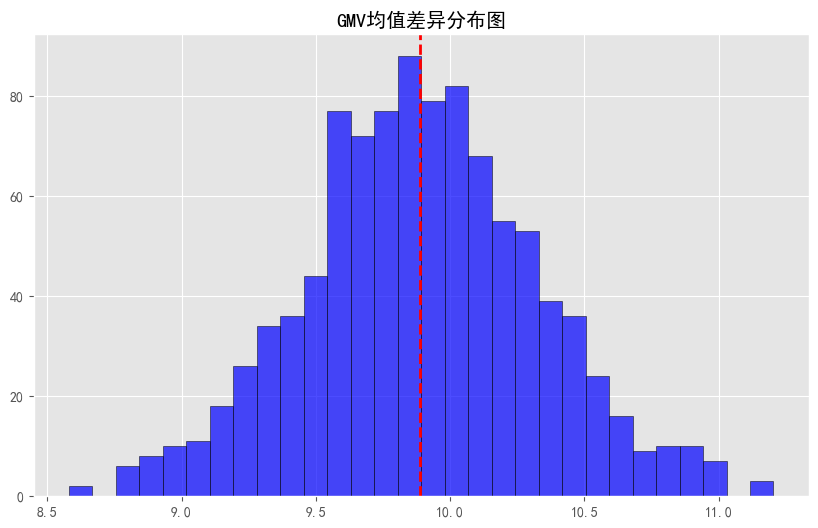

In [ ]:
# 绘制GMV指标差异分布图
x = []
for i in range(1000):
    gmv_control_sample = np.random.choice(gmv_control, 1000, replace=True).mean()
    gmv_treat_sample = np.random.choice(gmv_treat, 1000, replace=True).mean()
    x.append(gmv_treat_sample - gmv_control_sample)
plt.figure(figsize=(10,6))
plt.hist(x, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(mean_diff, color='red', linestyle='dashed', linewidth=2)
plt.title('GMV均值差异分布图')

Text(0.5, 1.0, 'GMV分布箱线图')

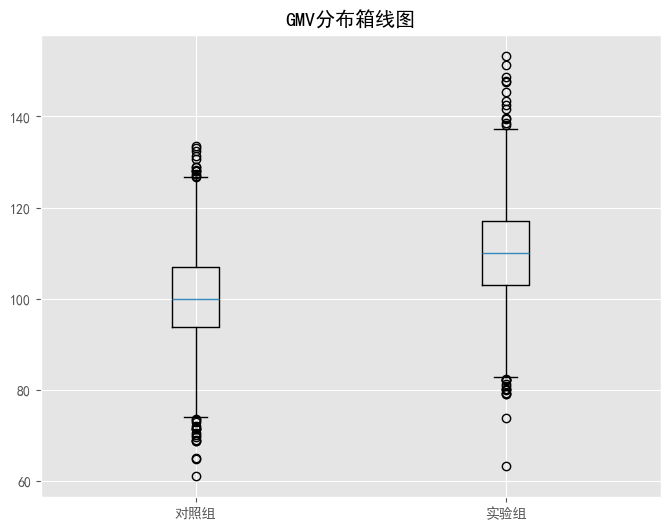

In [25]:
#绘制GMV分布的箱线图
plt.figure(figsize=(8,6))
plt.boxplot([gmv_control, gmv_treat], labels=['对照组', '实验组'])
plt.title('GMV分布箱线图')

Text(0.5, 1.0, 'GMV均值差异时序图')

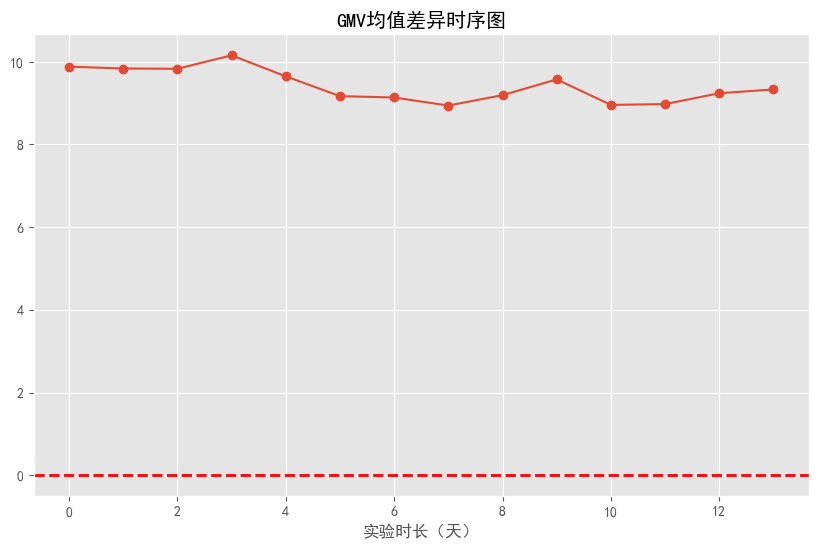

In [43]:
x_control = np.random.normal(100, 10,5000)
x_treat = np.random.normal(110, 10, 5000)
x = []
for i in range(14):
    x.append(x_treat.mean()-x_control.mean())
    x_control = np.concatenate([x_control, np.random.normal(100 +i * np.random.random(1), 10,5000)])
    x_treat = np.concatenate([x_treat, np.random.normal(110 + i * np.random.random(1), 10,5000)])
plt.figure(figsize=(10,6))
plt.Line2D(range(len(x)), x)
plt.plot(range(len(x)), x, marker='o')
plt.axhline(0, color='red', linestyle='dashed', linewidth=2)
plt.xlabel('实验时长（天）')
plt.title('GMV均值差异时序图')

Text(0.5, 0, '进入实验时长（天）')

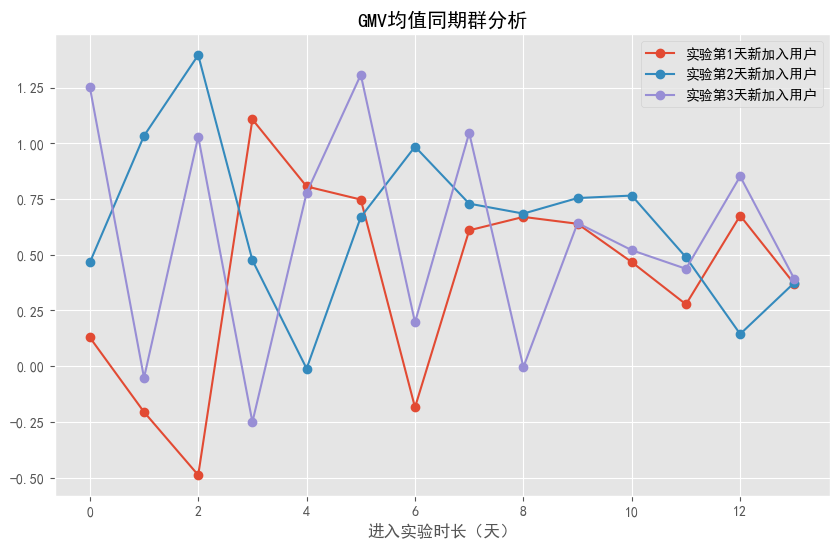

In [55]:
x_control = np.random.normal(100, 10,5000)
x_treat = np.random.normal(110, 10, 5000)
plt.figure(figsize=(10,6))

for t in range(3):
    x = []
    for i in range(14):
        x_control_sample = np.random.choice(x_control, np.random.randint(250, 300), replace=True)
        x_treat_sample = np.random.choice(x_treat, np.random.randint(250, 300), replace=True)
        x.append(x_treat_sample.sum()/x_treat.shape[0]-x_control_sample.sum()/x_control.shape[0])
    plt.plot(range(len(x)), x, marker='o', alpha=1, label=f'实验第{t+1}天新加入用户')
plt.legend()
plt.title('GMV均值同期群分析')“
plt.xlabel('进入实验时长（天）')
